__<span style="background-color:#ffffe0">第3章　時系列予測モデル構築・超入門</span>__

# 3.3　時系列の予測モデルを構築してみよう

##  3.3.5　Prophetで構築する予測モデル（ハイパーパラメータそのまま）

### 準備（必要なモジュールとデータの読み込み）

In [1]:
#
# 必要なモジュールの読み込み
#

import numpy as np
import pandas as pd
import datetime

from prophet import Prophet

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

from pmdarima.model_selection import train_test_split

import warnings
warnings.simplefilter('ignore')

import matplotlib.pyplot as plt
plt.style.use('ggplot') #グラフスタイル
plt.rcParams['figure.figsize'] = [12, 9] #グラフサイズ
plt.rcParams['font.size'] = 14 #フォントサイズ

In [2]:
#
# 必要なデータセット（時系列データ）の読み込み
#

dataset='AirPassengers.csv'  #データセットのファイル名
df = pd.read_csv(dataset)    #読み込み
df.columns = ['ds', 'y']     #日付：DS、目的変数：y

print(df) #確認

             ds    y
0    1949-01-01  112
1    1949-02-01  118
2    1949-03-01  132
3    1949-04-01  129
4    1949-05-01  121
..          ...  ...
139  1960-08-01  606
140  1960-09-01  508
141  1960-10-01  461
142  1960-11-01  390
143  1960-12-01  432

[144 rows x 2 columns]


In [3]:
#
# データセットを学習データとテストデータ（直近12ヶ月間）に分割
#

train, test = train_test_split(df, test_size=12)

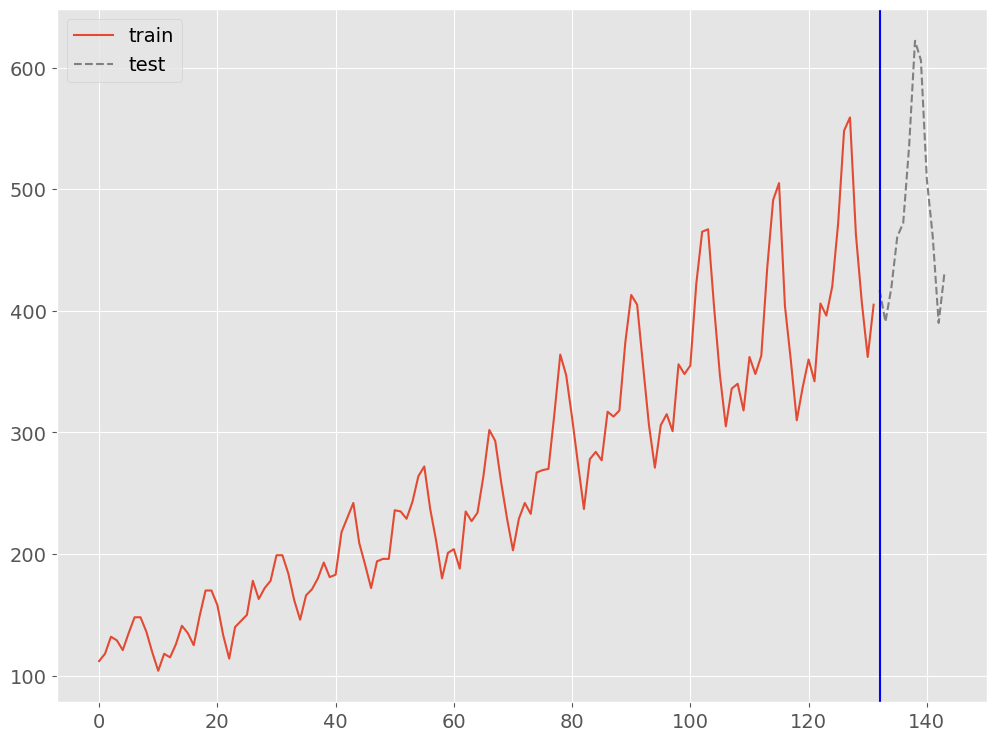

In [4]:
#
# グラフ（学習データとテストデータ）
#

fig, ax = plt.subplots()

# 学習データの描写
ax.plot(
    train.index,
    train.y.values, 
    linestyle='-',
    label='train')

# テストデータの描写
ax.plot(
    test.index, 
    test.y.values, 
    linestyle='--',
    label='test', 
    color='gray')

# 学習データとテスデータの間の縦線の描写
ax.axvline(
    132,
    color='blue')

# 凡例表示
ax.legend()

plt.show()

### 予測モデルの学習（学習データ利用）

In [5]:
#
# 予測モデルの学習（学習データ利用）
#

# インスタンスの生成
m = Prophet()

# 学習
m.fit(train)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


### 予測モデルのテスト（テストデータ利用）

In [6]:
#
# 予測の実施
#

# 予測（学習データ期間＋テストデータ期間）
df_future = m.make_future_dataframe(
    periods=12,
    freq='M')

df_pred = m.predict(df_future) 

# 元のデータセットに予測値を結合
df['predicted'] = df_pred['yhat']

# 予測値の格納
train_pred = df.iloc[:-12].loc[:,'predicted'] #学習データ期間
test_pred = df.iloc[-12:].loc[:,'predicted']  #テストデータ期間

In [7]:
#
# 予測精度（テストデータ）
#

print('RMSE:\n',
      np.sqrt(mean_squared_error(
          test.y, test_pred)))
print('MAE:\n',
      mean_absolute_error(
          test.y, test_pred)) 
print('MAPE:\n',
      mean_absolute_percentage_error(
          test.y, test_pred))

RMSE:
 41.56576290876941
MAE:
 33.96961472240947
MAPE:
 0.06773040965050241


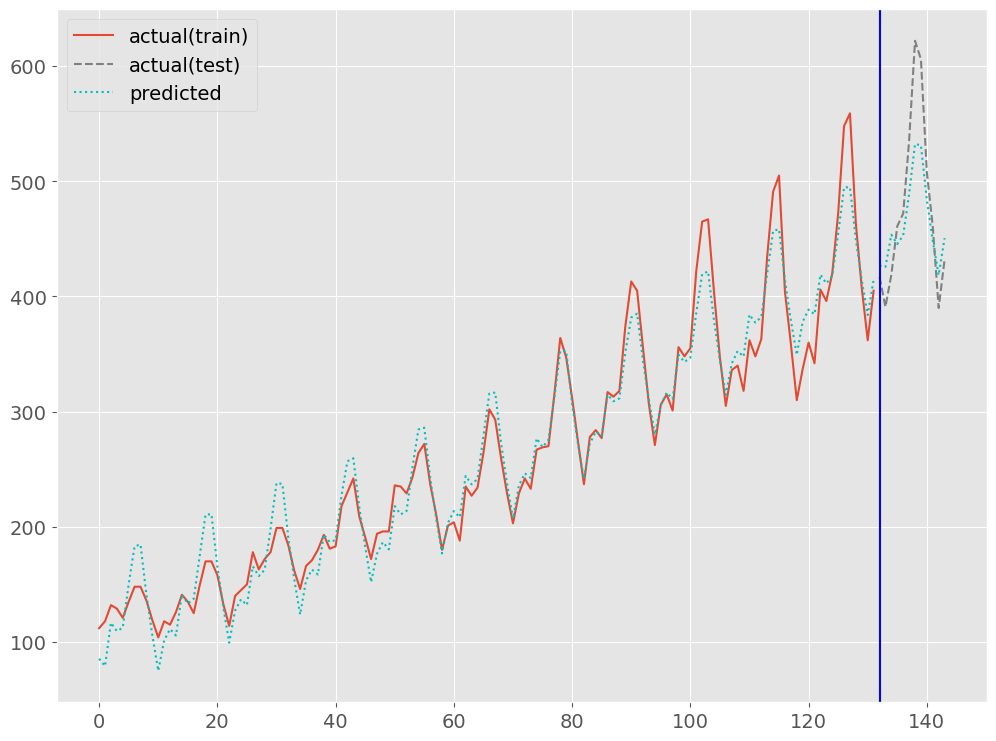

In [8]:
#
# グラフ（予測値と実測値）
#

fig, ax = plt.subplots()

# 実測値の描写
## 学習データ
ax.plot(
    train.index, 
    train.y,
    linestyle='-',
    label='actual(train)')

## テストデータ
ax.plot(test.index, 
        test.y, 
        linestyle='--',
        label='actual(test)', 
        color='gray')

# 予測値の描写
## 学習データ
ax.plot(
    train.index, 
    train_pred, 
    linestyle=':',
    color='c')

## テストデータ
ax.plot(
    test.index, 
    test_pred, 
    linestyle=':',
    label='predicted',
    color='c') 

# 学習データとテスデータの間の縦線の描写
ax.axvline(
    132,
    color='blue')

# 凡例表示
ax.legend()

plt.show()